https://www.hackerrank.com/challenges/battery/problem

In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.expand_frame_repr", True)

In [2]:
from sklearn import linear_model

In [3]:
data = pd.read_csv("trainingdata.txt", sep=",", header=None, names=["charged", "last"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
charged    100 non-null float64
last       100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.head()

,charged,last
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


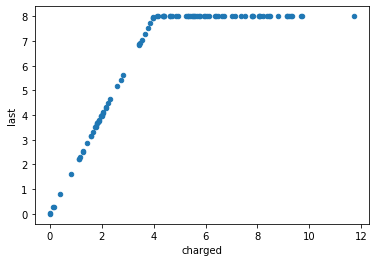

In [5]:
data.plot.scatter(x="charged", y="last")
plt.show()

Observe that when charged >= 4, last remains at 8. Because the battery is fully charged in 4 hours. Let's create Linear Regression without implementing this knowledge

In [6]:
model = linear_model.LinearRegression()
reg = model.fit(data.iloc[:, :-1].values, data.iloc[:, -1].values)
reg.score(data.iloc[:, :-1].values, data.iloc[:, -1].values)

0.6872269726243967

In [7]:
reg.coef_

array([0.72955585])

In [8]:
reg.intercept_

2.870541111621019

In [9]:
# [1.5].shape
# reg.predict(1.5)
# reg.predict(np.array(1.5))
# reg.predict(np.array([1.5]))

reg.predict(np.array([[1.5]]))

array([3.96487488])

In [10]:
reg.predict(np.array([[9]]))

array([9.43654373])

In [11]:
2.870541111621019 + 0.72955585 * (9)

9.436543761621019

Implement knowledge to Linear Regression

In [12]:
model2 = linear_model.LinearRegression()
reg2 = model2.fit(
    data[data["last"] < 8].iloc[:, :-1].values,
    data[data["last"] < 8].iloc[:, -1].values,
)
reg2.coef_

array([2.])

In [13]:
reg2.intercept_

0.0

In [14]:
reg2.predict([[1.5]])

array([3.])

In [15]:
reg2.predict([[8]])[0]

16.0